In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/var/folders/3m/l0tyzx5j5lg1wtczpcc3ff8h0000gn/T/ipykernel_3226/3993962526.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv('../clinical-notes-subsample/customer facing csv files/c_sample_patencdiscussions_notes.csv',  delimiter="|")

In [4]:
data.shape

(1899, 8)

In [5]:
data.head()

,encounter_id,patient_id,diagnosis_date,diagnosis,eye_location,discussion_id,discussion_snomed,"deidentified,,,,,,,,,,,,,"
0,137,6.0,1900-01-01 00:00:00+00:00,POAG,OU,1181.0,NaN,"allergic conjunctivitis with combigan, IOP not..."
1,123,5.0,1900-01-01 00:00:00+00:00,S/P LASIK,OU,521.0,NaN,"Stable.,,,,,,,,,,,,,"
2,123,5.0,1900-01-01 00:00:00+00:00,S/P LASIK,OU,1485.0,NaN,Patient reminded needs annual exams to keep VF...
3,9,3.0,1900-01-01 00:00:00+00:00,"POAG, Mild",OU,1289.0,NaN,Continue current management. Latanoprost gtts ...
4,9,3.0,1900-01-01 00:00:00+00:00,"POAG, Mild",OU,147.0,NaN,Discussed importance of compliance with ocular...


In [6]:
data.tail()

,encounter_id,patient_id,diagnosis_date,diagnosis,eye_location,discussion_id,discussion_snomed,"deidentified,,,,,,,,,,,,,"
1894,126,0.0,1900-01-01 00:00:00+00:00,Neovascular AMD with Active CN,OD,245.0,NaN,Recommended Avastin injection today. The injec...
1895,126,0.0,1900-01-01 00:00:00+00:00,Neovascular AMD with Active CN,OD,1814.0,NaN,We discussed the natural history of this disea...
1896,146,0.0,1900-01-01 00:00:00+00:00,Neovascular AMD with Active CN,OD,415.0,NaN,Recommended Avastin injection today. The injec...
1897,146,0.0,1900-01-01 00:00:00+00:00,Neovascular AMD with Active CN,OD,898.0,NaN,We discussed the natural history of this disea...
1898,146,0.0,1900-01-01 00:00:00+00:00,Neovascular AMD with Active CN,OD,1878.0,NaN,"Extend next visit to 6 weeks.,,,,,,,,,,,,,"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   encounter_id               1899 non-null   object 
 1   patient_id                 1867 non-null   float64
 2   diagnosis_date             1867 non-null   object 
 3   diagnosis                  1867 non-null   object 
 4   eye_location               329 non-null    object 
 5   discussion_id              1867 non-null   float64
 6   discussion_snomed          2 non-null      float64
 7   deidentified,,,,,,,,,,,,,  1867 non-null   object 
dtypes: float64(3), object(5)
memory usage: 118.8+ KB


## Checking for Duplication

In [9]:
data.nunique()

encounter_id                  188
patient_id                     10
diagnosis_date                  1
diagnosis                      28
eye_location                    4
discussion_id                1867
discussion_snomed               1
deidentified,,,,,,,,,,,,,     610
dtype: int64

In [10]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [encounter_id, patient_id, diagnosis_date, diagnosis, eye_location, discussion_id, discussion_snomed, deidentified,,,,,,,,,,,,,]
Index: []


No  duplicated rows found

## Checking Missing Values

In [11]:
data.isnull().sum()

encounter_id                    0
patient_id                     32
diagnosis_date                 32
diagnosis                      32
eye_location                 1570
discussion_id                  32
discussion_snomed            1897
deidentified,,,,,,,,,,,,,      32
dtype: int64

In [12]:
(data.isnull().sum()/(len(data)))*100

encounter_id                  0.000000
patient_id                    1.685097
diagnosis_date                1.685097
diagnosis                     1.685097
eye_location                 82.675092
discussion_id                 1.685097
discussion_snomed            99.894681
deidentified,,,,,,,,,,,,,     1.685097
dtype: float64

<Axes: >

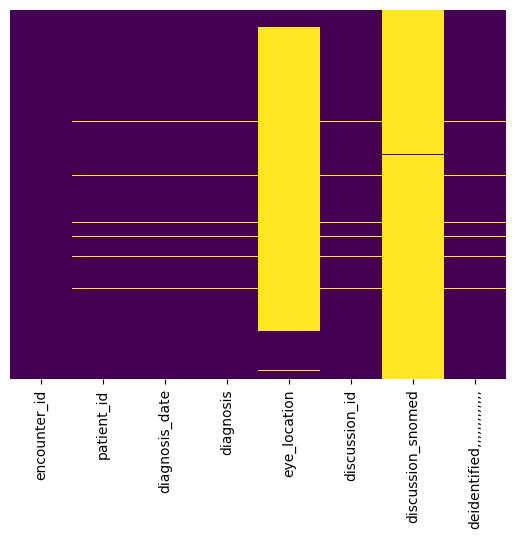

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Checking for inconsistent data types

In [15]:
data_types = data.dtypes
print(data_types)

encounter_id                  object
patient_id                   float64
diagnosis_date                object
diagnosis                     object
eye_location                  object
discussion_id                float64
discussion_snomed            float64
deidentified,,,,,,,,,,,,,     object
dtype: object
